
# UMAP 



## import libraries

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import umap

## function definitions

In [160]:
def convert2numpy(labels, features_ff, features_cs, features_tf):
    # define lists to convert to binary
    cancer_list = ["A", "B", "C", "Lung", "Breast"]
    gender_list = ["male"]
    # convert to binary and drop 
    labels["cancer"] = np.where(labels["diagnosis"].isin(cancer_list), 1, 0)
    features_tf["gender_binary"] = np.where(features_tf["gender"].isin(gender_list), 1, 0)
    labels.drop(columns = ["diagnosis"], inplace = True)
    features_tf.drop(columns =  ["gender"], inplace = True)
    # to wide format and set sampls as indices
    features_ff = features_ff.pivot(index = "sample", columns = ["length"], values = "count")
    features_cs = features_cs.pivot(index = "sample", columns = ["region-set"], values = ["Dip_area", "Dip_depth"])
    features_cs.columns = [i[0] + "_" + i[1] for i in features_cs.columns]
    features_cs[features_cs.index != "EE87952"]
    features_tf.set_index("sample", inplace = True)
    labels.set_index("sample", inplace = True)
    # sort indices
    index = [index for index in labels.index if index in list(features_tf.index) and list(features_ff.index) and list(features_cs.index)]
    features_ff = features_ff.loc[index]
    features_tf = features_tf.loc[index]
    features_cs = features_cs.loc[index]
    labels = labels.loc[index]
    
    # only return if function worked and everthing is in right order
    if np.array([np.array_equal(labels.index, features_ff.index), 
                 np.array_equal(labels.index, features_tf.index), 
                 np.array_equal(labels.index, features_cs.index)]).all():
        
        
        
        labels_np = labels.to_numpy(copy=True)
        features_ff_np = features_ff.to_numpy(copy=True)
        features_tf_np = features_tf.to_numpy(copy=True)
        features_cs_np = features_cs.to_numpy(copy=True)
            
            
        return labels, features_ff, features_cs, features_tf, labels_np, features_ff_np, features_cs_np, features_tf_np
    
def diag2num(diagnosis):
    local  = []
    
    for diag in diagnosis:
        
        if diag == "A":
            diag = 0
        elif diag == "B":
            diag = 100
        elif diag == "C":
            diag = 200
        elif diag == "Breast":
            diag = 300
        elif diag == "Lung":
            diag  = 400
        elif diag == "Healthy":
            diag = 500
        
        local.append(diag)
        
    return local

def UMAP(features, params, colors,title = " ", plot = True):
    n_neighbors, min_dist = params
    reducer = umap.UMAP(n_neighbors = n_neighbors, min_dist = min_dist)
    embed = reducer.fit_transform(features)
    
    embed = pd.DataFrame(embed, columns = ["dim1", "dim2"])
    embed["Diagnosis"] = colors
    
    if plot == True:
        plt.figure(figsize = (10, 10))
        sns.scatterplot(data = embed, x = "dim1", y= "dim2", hue = "Diagnosis", palette = "Set1").set(title = title)
        plt.show()
        plt.clf()
        
    return embed
    
    
    

## import data

In [154]:
labels = pd.read_csv("Results/Machine_Learning/sample_map_ML.csv")
features_ff  = pd.read_csv("Results/Machine_Learning/fragment_features_CNA_ML.csv")
features_cs  = pd.read_csv("Results/Machine_Learning/cell_type_signatures_LIQ_ML.csv")
features_tf  = pd.read_csv("Results/Machine_Learning/tumour_fractions_ML.csv")

labels_df, features_ff_df, features_cs_df, features_tf_df, labels, features_ff, features_cs, features_tf = convert2numpy(labels, features_ff, features_cs, features_tf)

# scale np arrays
scaled_features_ff = StandardScaler().fit_transform(features_ff)
scaled_features_tf = StandardScaler().fit_transform(features_tf)
scaled_features_cs = StandardScaler().fit_transform(features_cs)

# import diagnosis
cancer_list = ["A", "B", "C", "Lung", "Breast"]

diagnosis = pd.read_csv("Results/Machine_Learning/sample_map_ML.csv")
diagnosis.set_index("sample", inplace = True)
diagnosis.drop(index = "EE88290", inplace = True)
diagnosis.sort_index(inplace = True)
diagnosis_subtypes = diagnosis.to_numpy(copy = True).reshape(480,)
diagnosis_cancer = np.where(pd.Series(diagnosis_subtypes).isin(cancer_list), "Cancer", "Healthy")

# UMAP

In [135]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

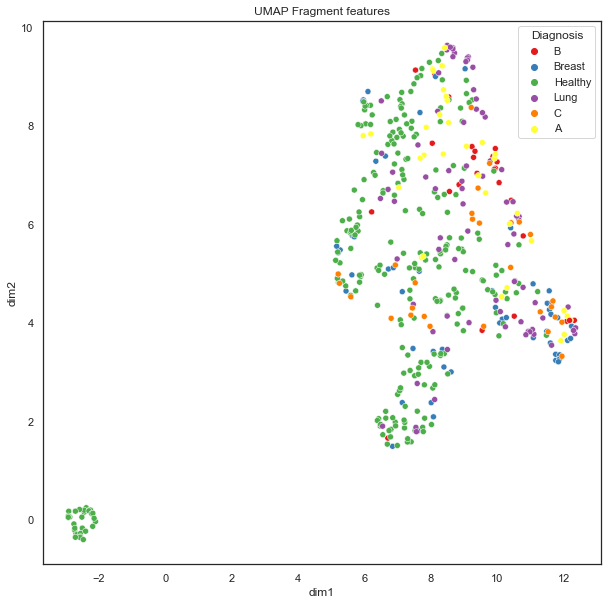

<Figure size 1008x720 with 0 Axes>

In [161]:
params = (20, 0.1)
embed = UMAP(scaled_features_ff, params, diagnosis_subtypes, title = "UMAP Fragment features")

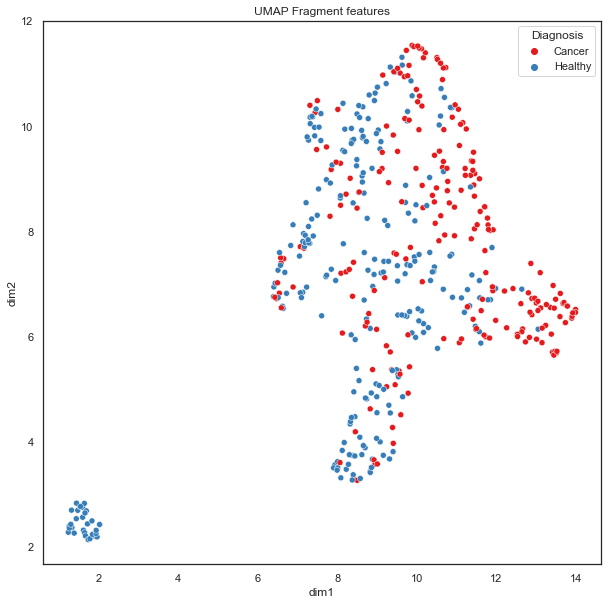

<Figure size 1008x720 with 0 Axes>

In [162]:
params = (20, 0.1)
embed = UMAP(scaled_features_ff, params, diagnosis_cancer, title = "UMAP Fragment features")

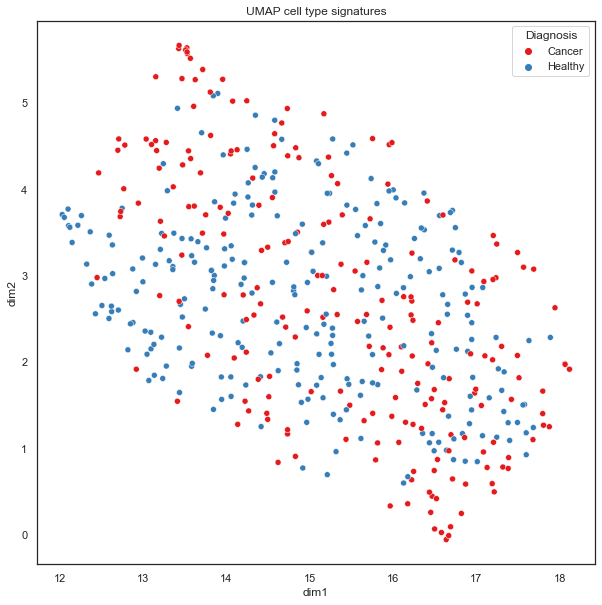

<Figure size 1008x720 with 0 Axes>

In [163]:
params = (20, 0.1)
embed = UMAP(scaled_features_cs, params, diagnosis_cancer, title = "UMAP cell type signatures")

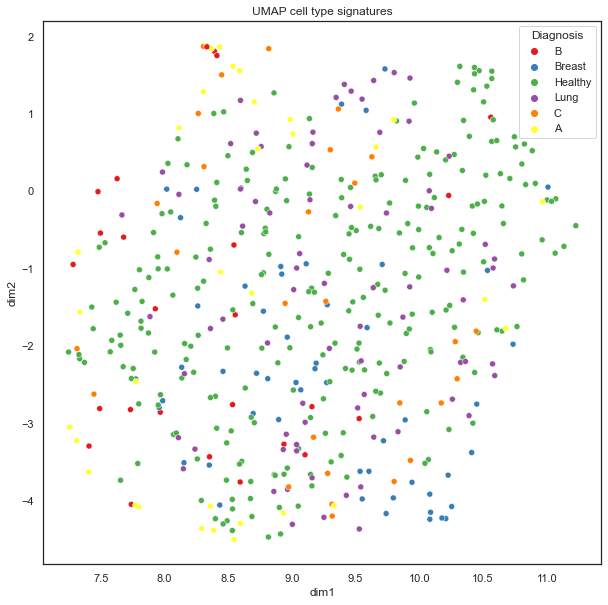

<Figure size 1008x720 with 0 Axes>

In [164]:
params = (20, 0.1)
embed = UMAP(scaled_features_cs, params, diagnosis_subtypes, title = "UMAP cell type signatures")

In [44]:
n_neighbors = 10
min_dist = 0.5
n_components = 5
reducer = umap.UMAP(n_neighbors = n_neighbors, min_dist = min_dist)
embed_ff = reducer.fit_transform(scaled_features_ff)

In [27]:
embed_ff.shape

(480, 2)

In [28]:
labels.shape

(480, 1)

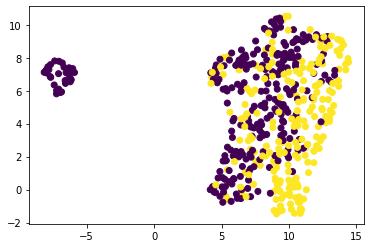

In [43]:
color_map = dict(zip([1, 0], sns.color_palette("Set1", 2)))
plt.scatter(x = embed_ff[:, 0], y = embed_ff[:, 1], c = labels)

In [118]:
diagnosis = pd.read_csv("Results/Machine_Learning/sample_map_ML.csv")
diagnosis.set_index("sample", inplace = True)
diagnosis.drop(index = "EE88290", inplace = True)
diagnosis.sort_index(inplace = True)
diagnosis = diagnosis.to_numpy(copy = True)

In [119]:
n_neighbors = 3
min_dist = 0.2
n_components = 2
reducer = umap.UMAP(n_neighbors = n_neighbors, min_dist = min_dist)
embed_cs = reducer.fit_transform(scaled_features_cs)

In [80]:
# diagnosis = diag2num(diagnosis)

In [120]:
embed = pd.DataFrame(embed_cs, columns = ["dim1", "dim2"])
embed["color"] = diagnosis
embed.tail()

,dim1,dim2,color
475,4.079987,-0.631402,A
476,6.569900,1.767130,A
477,6.515954,3.207634,A
478,10.733798,7.890742,A
479,3.739218,-0.206720,B


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

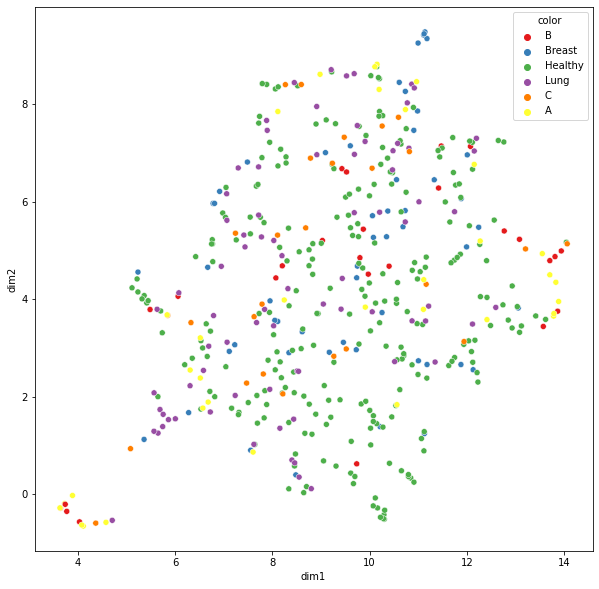

In [121]:
# color_map = dict(zip([1, 0], sns.color_palette("Set1", 2)))
# plt.figure(figsize = (10, 10))
# plt.scatter(x = embed_ff[:, 0], y = embed_ff[:, 1], c = diagnosis)

# for n, df in embed.groupby(by = "color"):
#     plt.scatter(x =df["dim1"], y = df["dim2"], c= df["color"], label = n )
    
# plt.legend()
plt.figure(figsize = (10, 10))
sns.scatterplot(data = embed, x = "dim1", y= "dim2", hue = "color", palette = "Set1")

In [101]:
for n, df in embed.groupby(by = "color"):
    print(df)

         dim1       dim2  color
445  7.484382  13.809617      0
446  7.515505  13.649729      0
447  7.477737   9.966255      0
448  8.715115  11.429900      0
449  7.692518   6.125118      0
450  7.517313   8.318462      0
451  7.929083  10.502971      0
452  5.786921   9.438630      0
453  8.473016  12.398230      0
454  6.489567  13.696493      0
455  7.231941  13.789064      0
456  7.585799  13.666279      0
457  7.745056   6.217499      0
458  8.424953  12.377039      0
459  7.614188  13.358615      0
460  8.749854  11.510684      0
461  8.704600  11.868618      0
462  8.676271  10.833049      0
463  6.472154  11.926697      0
464  7.798841   6.803712      0
465  7.631411   7.142735      0
466  7.622849   7.562746      0
467  6.987010  11.884360      0
468  7.278642  10.025856      0
469  6.012917  11.340406      0
470  3.666718  10.051061      0
471  5.812498   8.102024      0
472  5.244792   7.429562      0
473  7.761798   6.295217      0
474  7.068673   7.898968      0
475  7.7